## 2.6 Probability and Statistics

In [7]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

### 2.6.1 A Simple Example: Tossing Coins

In [8]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [50, 50]


In [9]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([50., 50.])

In [10]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5200, 0.4800])

In [11]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5002, 0.4998])

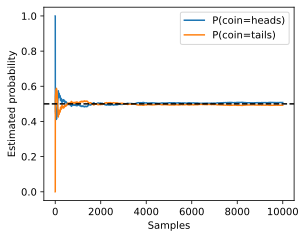

In [14]:
import matplotlib.pyplot as plt

counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

plt.figure(figsize=(4.5, 3.5))
plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.xlabel('Samples')
plt.ylabel('Estimated probability')
plt.legend()
plt.show()